Child's Height Prediction based on Parents and families traits
 


In [ ]:
# Importing the Dataset : 
import pandas as pd 
dataset = pd.read_csv('galtonheightdataset.csv')



In [ ]:
dataset

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1,0
1,1,78.5,67.0,F,69.2,4,0,1
2,1,78.5,67.0,F,69.0,4,0,1
3,1,78.5,67.0,F,69.0,4,0,1
4,2,75.5,66.5,M,73.5,4,1,0
...,...,...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8,1,0
894,136A,68.5,65.0,M,67.7,8,1,0
895,136A,68.5,65.0,F,64.0,8,0,1
896,136A,68.5,65.0,F,63.5,8,0,1


In [ ]:
dataset.rename(columns = {'family':'familyid','father':'fatherheight','mother':'motherheight','gender':'childgender','height':'childheight','kids':'numberofkids'},inplace = True)

In [ ]:
dataset

,familyid,fatherheight,motherheight,childgender,childheight,numberofkids,male,female
0,1,78.5,67.0,M,73.2,4,1,0
1,1,78.5,67.0,F,69.2,4,0,1
2,1,78.5,67.0,F,69.0,4,0,1
3,1,78.5,67.0,F,69.0,4,0,1
4,2,75.5,66.5,M,73.5,4,1,0
...,...,...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8,1,0
894,136A,68.5,65.0,M,67.7,8,1,0
895,136A,68.5,65.0,F,64.0,8,0,1
896,136A,68.5,65.0,F,63.5,8,0,1


In [ ]:
# Importing the necessary libraries 
import tensorflow as tf
import seaborn as sns 
from tensorflow import keras
from tensorflow.keras import layers
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.9.2


In [ ]:
# Checking for Null Values in the dataset : 
dataset.isna().sum()

familyid        0
fatherheight    0
motherheight    0
childgender     0
childheight     0
numberofkids    0
male            0
female          0
dtype: int64

In [ ]:
dataset.dtypes

familyid         object
fatherheight    float64
motherheight    float64
childgender      object
childheight     float64
numberofkids      int64
male              int64
female            int64
dtype: object

Inspecting the data : 



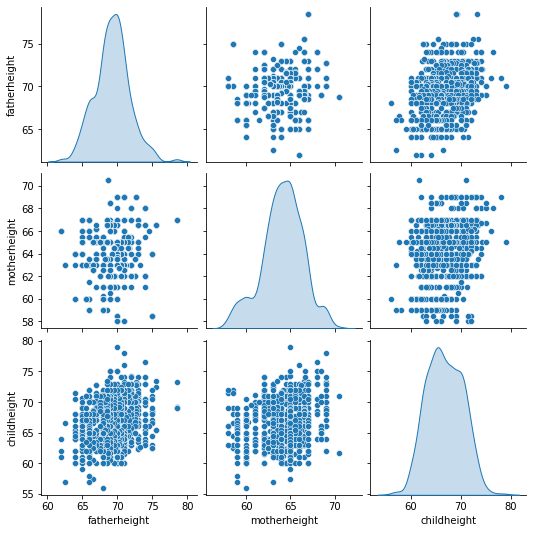

In [ ]:
sns.pairplot(dataset[['fatherheight', 'motherheight','childheight']], diag_kind='kde')

In [ ]:
# Splitting the data into training and testing parts: 
dataset

,familyid,fatherheight,motherheight,childgender,childheight,numberofkids,male,female
0,1,78.5,67.0,M,73.2,4,1,0
1,1,78.5,67.0,F,69.2,4,0,1
2,1,78.5,67.0,F,69.0,4,0,1
3,1,78.5,67.0,F,69.0,4,0,1
4,2,75.5,66.5,M,73.5,4,1,0
...,...,...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8,1,0
894,136A,68.5,65.0,M,67.7,8,1,0
895,136A,68.5,65.0,F,64.0,8,0,1
896,136A,68.5,65.0,F,63.5,8,0,1


In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fatherheight,898.0,69.232851,2.470256,62.0,68.0,69.0,71.0,78.5
motherheight,898.0,64.084410,2.307025,58.0,63.0,64.0,65.5,70.5
childheight,898.0,66.760690,3.582918,56.0,64.0,66.5,69.7,79.0
numberofkids,898.0,6.135857,2.685156,1.0,4.0,6.0,8.0,15.0
male,898.0,0.517817,0.499961,0.0,0.0,1.0,1.0,1.0
female,898.0,0.482183,0.499961,0.0,0.0,0.0,1.0,1.0


In [ ]:
dataset = dataset.drop(['familyid'],axis = 1 )

In [ ]:
dataset

,fatherheight,motherheight,childgender,childheight,numberofkids,male,female
0,78.5,67.0,M,73.2,4,1,0
1,78.5,67.0,F,69.2,4,0,1
2,78.5,67.0,F,69.0,4,0,1
3,78.5,67.0,F,69.0,4,0,1
4,75.5,66.5,M,73.5,4,1,0
...,...,...,...,...,...,...,...
893,68.5,65.0,M,68.5,8,1,0
894,68.5,65.0,M,67.7,8,1,0
895,68.5,65.0,F,64.0,8,0,1
896,68.5,65.0,F,63.5,8,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['childgender'] = le.fit_transform(dataset['childgender'])


In [ ]:
dataset

,fatherheight,motherheight,childgender,childheight,numberofkids,male,female
0,78.5,67.0,1,73.2,4,1,0
1,78.5,67.0,0,69.2,4,0,1
2,78.5,67.0,0,69.0,4,0,1
3,78.5,67.0,0,69.0,4,0,1
4,75.5,66.5,1,73.5,4,1,0
...,...,...,...,...,...,...,...
893,68.5,65.0,1,68.5,8,1,0
894,68.5,65.0,1,67.7,8,1,0
895,68.5,65.0,0,64.0,8,0,1
896,68.5,65.0,0,63.5,8,0,1


Scaling the data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset.to_numpy())
dataset = pd.DataFrame(dataset,columns = ['fatherheight','motherheight','childgender','childheight','numberofkids','male','female'])

dataset

,fatherheight,motherheight,childgender,childheight,numberofkids,male,female
0,1.000000,0.72,1.0,0.747826,0.214286,1.0,0.0
1,1.000000,0.72,0.0,0.573913,0.214286,0.0,1.0
2,1.000000,0.72,0.0,0.565217,0.214286,0.0,1.0
3,1.000000,0.72,0.0,0.565217,0.214286,0.0,1.0
4,0.818182,0.68,1.0,0.760870,0.214286,1.0,0.0
...,...,...,...,...,...,...,...
893,0.393939,0.56,1.0,0.543478,0.500000,1.0,0.0
894,0.393939,0.56,1.0,0.508696,0.500000,1.0,0.0
895,0.393939,0.56,0.0,0.347826,0.500000,0.0,1.0
896,0.393939,0.56,0.0,0.326087,0.500000,0.0,1.0


In [ ]:
dataset

,fatherheight,motherheight,childgender,childheight,numberofkids,male,female
0,1.000000,0.72,1.0,0.747826,0.214286,1.0,0.0
1,1.000000,0.72,0.0,0.573913,0.214286,0.0,1.0
2,1.000000,0.72,0.0,0.565217,0.214286,0.0,1.0
3,1.000000,0.72,0.0,0.565217,0.214286,0.0,1.0
4,0.818182,0.68,1.0,0.760870,0.214286,1.0,0.0
...,...,...,...,...,...,...,...
893,0.393939,0.56,1.0,0.543478,0.500000,1.0,0.0
894,0.393939,0.56,1.0,0.508696,0.500000,1.0,0.0
895,0.393939,0.56,0.0,0.347826,0.500000,0.0,1.0
896,0.393939,0.56,0.0,0.326087,0.500000,0.0,1.0


In [ ]:
df = dataset 

Applying Linear Regression Using Deep Learning 

In [ ]:
# Splitting the Data into features and target ( Childheight)

X = df.drop('childheight',axis=1)
y = df['childheight']

In [ ]:
# Splitting into training and testing 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 20)



In [ ]:
print(X_train)
print("------")
print(X_test)
print("------")
print(y_train)
print("------")
print(y_test)

     fatherheight  motherheight  childgender  numberofkids  male  female
857      0.181818         0.400          1.0      0.142857   1.0     0.0
510      0.454545         0.320          1.0      0.142857   1.0     0.0
428      0.424242         0.696          1.0      0.357143   1.0     0.0
698      0.303030         0.560          0.0      0.357143   0.0     1.0
438      0.424242         0.680          1.0      0.285714   1.0     0.0
..            ...           ...          ...           ...   ...     ...
218      0.545455         0.360          0.0      0.285714   0.0     1.0
223      0.545455         0.320          1.0      0.428571   1.0     0.0
271      0.484848         0.560          1.0      0.500000   1.0     0.0
474      0.424242         0.560          0.0      0.428571   0.0     1.0
355      0.515152         0.400          1.0      0.285714   1.0     0.0

[718 rows x 6 columns]
------
     fatherheight  motherheight  childgender  numberofkids  male  female
379      0.503030   

In [ ]:
# Defining the Model : 
model = Sequential()
model.add(Dense(128,input_dim = 6,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))

# OutPut Layer : 
model.add(Dense(1 , activation = 'linear'))


In [ ]:
model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               896       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,validation_split = 0.2 , epochs = 100)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 0.0718 - mae: 0.2008 - val_loss: 0.0279 - val_mae: 0.1342
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0114 - mae: 0.0858 - val_loss: 0.0123 - val_mae: 0.0858
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0094 - mae: 0.0774 - val_loss: 0.0120 - val_mae: 0.0842
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0085 - mae: 0.0747 - val_loss: 0.0120 - val_mae: 0.0838
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0082 - mae: 0.0725 - val_loss: 0.0117 - val_mae: 0.0829
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0719 - val_loss: 0.0120 - val_mae: 0.0839
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0714 - val_loss: 0.0118 - val_mae: 0.0837
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0079 - 

In [ ]:
# Prediction on test data : 
predictions = model.predict(X_test[:5])
print("Predicted Values are :",predictions)
print("Real Values are : ",y_test[:5])

Predicted Values are : [[0.56535137]
 [0.51888937]
 [0.35070533]
 [0.38277572]
 [0.35070533]]
Real Values are :  379    0.595652
621    0.434783
573    0.456522
200    0.347826
574    0.400000
Name: childheight, dtype: float64


In [ ]:
# Score for Neural Network Model : 
mse_neural,mae_neural = model.evaluate(X_test,y_test)
print("Mean squared Error From Neural Network : ",mse_neural)
print("Mean absolute Error From Neural Network : ",mae_neural)

6/6 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0731
Mean squared Error From Neural Network :  0.008910481818020344
Mean absolute Error From Neural Network :  0.07313445210456848


**Using Linear Regression :**

In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
print(y_pred_lr)

[0.57959859 0.53873607 0.34387101 0.36573014 0.34387101 0.36266791
 0.42502304 0.59328089 0.3158273  0.57305544 0.53873607 0.45928936
 0.53097881 0.27838557 0.56457293 0.32992121 0.25037987 0.5870353
 0.50769112 0.39519446 0.34542865 0.57306252 0.67424284 0.21298411
 0.37974802 0.61827741 0.34236642 0.37820541 0.30041887 0.30045689
 0.37506007 0.54502676 0.54180538 0.58692921 0.52165596 0.25037987
 0.60414548 0.57297941 0.54352217 0.6058322  0.3735935  0.6058322
 0.37659473 0.52639696 0.47027946 0.57142177 0.45928936 0.52625284
 0.27847663 0.40944752 0.60264089 0.46554203 0.25037987 0.48580988
 0.54180538 0.65407839 0.40938652 0.35957561 0.54188141 0.32048518
 0.65407839 0.39072666 0.32834854 0.6058322  0.53556774 0.40778378
 0.60663452 0.31118531 0.57297941 0.35730862 0.53873607 0.57142177
 0.32366854 0.38926803 0.56523718 0.36824924 0.59016561 0.59016561
 0.40156118 0.35948455 0.60103815 0.5386901  0.39519446 0.48580988
 0.36261486 0.35957561 0.27847663 0.69155813 0.44053486 0.395194

In [ ]:
# Score for Linear Regression Model : 
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  0.008736747329835082
Mean absolute error from linear regression:  0.07272966667578622


In [ ]:
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  0.013403197844585006
Mean absolute error using decision tree:  0.08869506399397699


In [ ]:
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=30)

In [ ]:
y_pred_RF = model.predict(X_test)

In [ ]:
mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean squared error using Random Forest:  0.011065385712574984
Mean absolute error Using Random Forest:  0.07943169740440269


In [ ]:
# Feature Ranking : 
#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

male            0.189762
childgender     0.189200
female          0.187921
fatherheight    0.187138
motherheight    0.149917
numberofkids    0.096062
dtype: float64
